<div style="text-align: right"> Projet Machine Learning <br/> Julia Locatelli <br/> Jonathan Yuste</div>

<h1><center>Projet Machine Learning: <br/> Classification d'un genre de musique</center></h1>
<br/>
<div class='text-danger'><center> Objectif : Déterminer le genre d'une musique</center></div>

## L'objectif du projet
Nous devons utiliser nos connaissances acquises en cours afin de :
* Utiliser le Machine Learning,
* Analyser le dataset choisi,
* Prédire/Résoudre un problème choisi avec différentes approches,
* Recommander la meilleure solution.

Dans notre cas, nous avons sélectionné le dataset "Spotify Genre Audio Features". Le but est de déterminer le genre d'une musique grâce à plusieurs caractéristiques.

Il faut tout d'abord importer plusieurs bibliothèques pour notre projet.

In [1]:
from numpy import mean
from numpy import std
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.svm import SVC
from sklearn.multiclass import OneVsOneClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import seaborn as sns

## Initialisation du dataset

Étant donné que nous avons téléchargé un dataset, il faut que nous puissions l'importer et le lire.
Pour cela nous utilisons "pandas" afin de lire notre document excel.

In [2]:
tracks = pd.read_excel("spotify_genre_final.xlsx")

print(tracks.head())
print(tracks.columns)

  Genre                          Title  \
0  rock                   Baba O'Riley   
1  rock            More Than a Feeling   
2  rock        (Don't Fear) The Reaper   
3  rock           Jump - 2015 Remaster   
4  rock  Stairway to Heaven - Remaster   

                                    Album_cover_link            Artist  \
0  https://i.scdn.co/image/ab67616d0000b273fe24dc...           The Who   
1  https://i.scdn.co/image/ab67616d0000b27390ef97...            Boston   
2  https://i.scdn.co/image/ab67616d0000b2733ac318...  Blue Öyster Cult   
3  https://i.scdn.co/image/ab67616d0000b273b414c6...         Van Halen   
4  https://i.scdn.co/image/ab67616d0000b273c8a11e...      Led Zeppelin   

   duration_ms  explicit                      id  popularity release_date  \
0       300400     False  3qiyyUfYe7CRYLucrPmulD          75   1971-08-14   
1       285133     False  1QEEqeFIZktqIpPI4jSVSF          78         1976   
2       308120     False  5QTxFnGygVM4jFQiBovmRo          76         19

Dans ce document, nous n'avons pas besoin de toutes les colonnes pour définir le genre d'une musique.
C'est pour cela que nous allons en ignorer certaines.

In [3]:
ColPasUtile = ['Genre','Title', 'Album_cover_link', 'Artist', 'duration_ms', 'id', 'popularity', 'release_date',
       'release_date_precision', 'total_tracks','time_signature']

y = tracks['Genre'].values
X = tracks.drop(ColPasUtile, axis=1).values

print(y)
print(X)


['rock' 'rock' 'rock' ... 'r&b' 'r&b' 'r&b']
[[False 0.489 0.724 ... 0.287 0.15 117.292]
 [False 0.377 0.681 ... 0.0504 0.285 108.789]
 [False 0.333 0.927 ... 0.297 0.385 141.466]
 ...
 [False 0.507 0.832 ... 0.164 0.578 84.917]
 [False 0.85 0.7 ... 0.0616 0.74 139.98]
 [True 0.528 0.349 ... 0.175 0.195 89.347]]


# Analyse du dataset

Il est d'abord important de voir la proportion des différents genre dans notre dataset. Il est important de les prendre en compte afin d'avoir du recule sur les résultats que nous allons obtenir.

pop       1161
rock      1136
latin     1036
hiphop     971
edm        956
rap        926
r&b        731
Name: Genre, dtype: int64


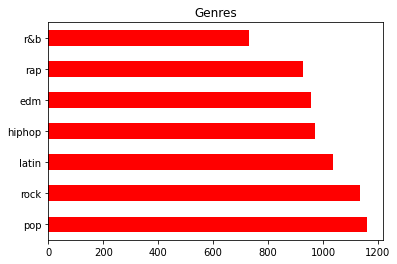

In [4]:
NbGenre = tracks["Genre"].value_counts()

print(NbGenre)

GraphNbGenre = NbGenre.plot(kind="barh",color=["red"],title="Genres")

On peut voir que le r&b est minoritairement représenté, l'algorithme aura donc plus de mal à retrouver ce genre.

### Correlation

Afin qu'on puisse comprendre la correlation entre nos différentes caractéristiques, nous allons faire une "heatmap". Plus la valeur se rapproche de 1 plus elles sont liées.


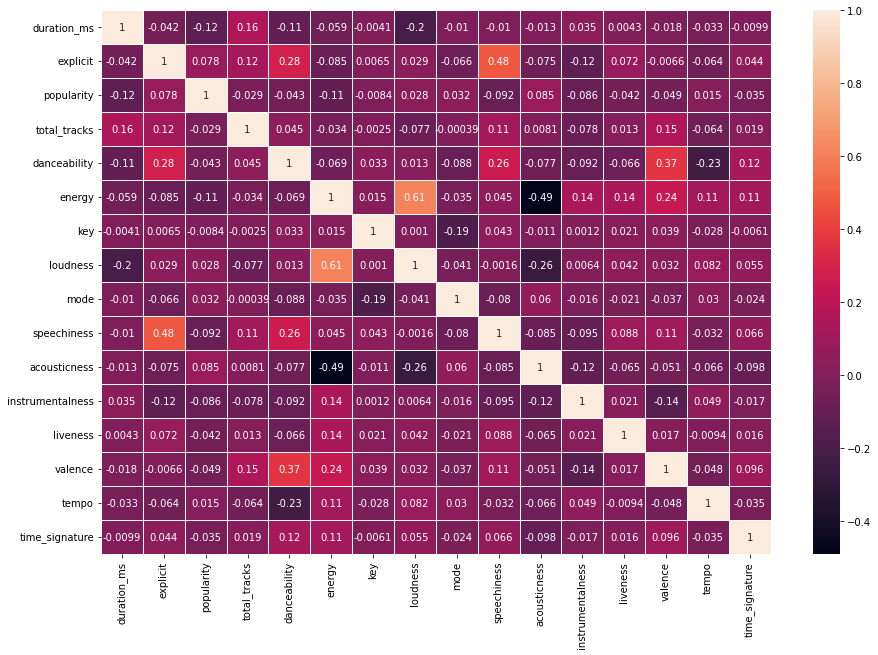

In [5]:
corr_matrix=tracks.corr()
fig,ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,
              annot=True,
              linewidths=0.5)

Nous pouvons observé que "loudness" et "energy" sont vraiment liés afin de définir un genre, de même pour les "speechiness" et "explicit".

# Classification

Dans notre projet nous devons faire une classification linéaire car nous avons des caractéristiques fixes. Nous définissons ce qui va nous permettre de train et de tester. Il est important de mélanger nos données car elles sont triées par genre. Si nous ne mélangeons pas nos modèle ne vont pas s'entrainer sur certains genres.


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, test_size = 0.2, shuffle = True)

print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_train shape: (5533, 12)
y_train shape: (5533,)
X_test shape: (1384, 12)
y_test shape: (1384,)


C'est ici que nous définissons la musique disponible dans notre dataset que nous voulons tester.

In [29]:
#On change ici le numero de la musique qu'on veut tester
NumMusic = 12

### Logistic Regression

Dans un premier temps, nous utiliserons le modèle de logistic regression afin de résoudre notre problématique.

In [30]:
clf_lr = LogisticRegression(solver='lbfgs',max_iter=7000)

clf_lr.fit(X_train, y_train) 

LogisticRegression(max_iter=7000)

In [31]:
t = X_test[[NumMusic],:]

print(f"Valeurs des caractéristiques : {t}")

pred = clf_lr.predict(t)
pred_pr = clf_lr.predict_proba(t) 

t_pred = pred[0]
t_pred_pr = pred_pr[0]

train_score = clf_lr.score(X_train,y_train)
test_score = clf_lr.score(X_test,y_test)

print("Training set score: {:.2f} ".format(train_score))
print("Test set score: {:.2f} ".format(test_score))

result = (clf_lr.predict(t)[0])

print(f"Résultat prédit: {result}")
print(f"Genre : {y_test[NumMusic]}")

Valeurs des caractéristiques : [[False 0.582 0.81 5 -4.104 0 0.106 0.0763 0.0 0.351 0.874 73.954]]
Training set score: 0.50 
Test set score: 0.49 
Résultat prédit: rock
Genre : rock


### Bayes Classifers

#### Gaussian Naive Bayes

Nous allons par la suite essayer un nouveau modèle afin de voir s'il est plus performant que celui précédemment utilisé. Nous utilisons Gaussian Naive Bayes.

In [10]:
gnb = GaussianNB()

y_pred = gnb.fit(X_train, y_train)

In [11]:
t = X_test[[NumMusic],:]

print(f"Valeurs des caractéristiques : {t}")

pred = gnb.predict(t)
pred_pr = gnb.predict_proba(t) 

t_pred = pred[0]
t_pred_pr = pred_pr[0]

train_score = gnb.score(X_train,y_train)
test_score = gnb.score(X_test,y_test)

print("Training set score: {:.2f} ".format(train_score))
print("Test set score: {:.2f} ".format(test_score))

result = (gnb.predict(t)[0])

print(f"Résultat prédit: {result}")
print(f"Genre : {y_test[NumMusic]}")

Valeurs des caractéristiques : [[False 0.582 0.81 5 -4.104 0 0.106 0.0763 0.0 0.351 0.874 73.954]]
Training set score: 0.44 
Test set score: 0.44 
Résultat prédit: latin
Genre : rock


### Arbre de décision

In [12]:
dt = tree.DecisionTreeClassifier(max_depth= 4)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [13]:
t = X_test[[NumMusic],:]

print(f"Valeurs des caractéristiques : {t}")

pred = dt.predict(t)
pred_pr = dt.predict_proba(t) 

t_pred = pred[0]
t_pred_pr = pred_pr[0]

train_score = dt.score(X_train,y_train)
test_score = dt.score(X_test,y_test)

print("Training set score: {:.2f} ".format(train_score))
print("Test set score: {:.2f} ".format(test_score))

result = (dt.predict(t)[0])

print(f"Résultat prédit: {result}")
print(f"Genre : {y_test[NumMusic]}")

Valeurs des caractéristiques : [[False 0.582 0.81 5 -4.104 0 0.106 0.0763 0.0 0.351 0.874 73.954]]
Training set score: 0.44 
Test set score: 0.41 
Résultat prédit: latin
Genre : rock


[Text(0.5, 0.9, 'X[0] <= 0.5\ngini = 0.854\nsamples = 5533\nvalue = [760, 761, 820, 930, 599, 728, 935]'),
 Text(0.25, 0.7, 'X[1] <= 0.579\ngini = 0.82\nsamples = 3780\nvalue = [703, 209, 747, 706, 443, 95, 877]'),
 Text(0.125, 0.5, 'X[8] <= 0.0\ngini = 0.704\nsamples = 1297\nvalue = [235, 14, 125, 228, 83, 6, 606]'),
 Text(0.0625, 0.3, 'X[7] <= 0.082\ngini = 0.78\nsamples = 513\nvalue = [59, 6, 102, 157, 57, 5, 127]'),
 Text(0.03125, 0.1, 'gini = 0.707\nsamples = 194\nvalue = [49, 1, 10, 47, 8, 0, 79]'),
 Text(0.09375, 0.1, 'gini = 0.75\nsamples = 319\nvalue = [10, 5, 92, 110, 49, 5, 48]'),
 Text(0.1875, 0.3, 'X[10] <= 0.433\ngini = 0.566\nsamples = 784\nvalue = [176, 8, 23, 71, 26, 1, 479]'),
 Text(0.15625, 0.1, 'gini = 0.651\nsamples = 444\nvalue = [156, 2, 11, 57, 15, 1, 202]'),
 Text(0.21875, 0.1, 'gini = 0.328\nsamples = 340\nvalue = [20, 6, 12, 14, 11, 0, 277]'),
 Text(0.375, 0.5, 'X[8] <= 0.001\ngini = 0.824\nsamples = 2483\nvalue = [468, 195, 622, 478, 360, 89, 271]'),
 Text(0

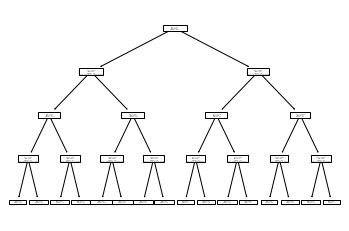

In [14]:
tree.plot_tree(dt)

### One vs Rest

In [15]:
ovr = OneVsRestClassifier(SVC())
ovr.fit(X_train, y_train)

OneVsRestClassifier(estimator=SVC())

In [16]:
t = X_test[[NumMusic],:]

print(f"Valeurs des caractéristiques : {t}")

pred = ovr.predict(t)

t_pred = pred[0]

train_score = ovr.score(X_train,y_train)
test_score = ovr.score(X_test,y_test)

print("Training set score: {:.2f} ".format(train_score))
print("Test set score: {:.2f} ".format(test_score))

result = (ovr.predict(t)[0])

print(f"Résultat prédit: {result}")
print(f"Genre : {y_test[NumMusic]}")

Valeurs des caractéristiques : [[False 0.582 0.81 5 -4.104 0 0.106 0.0763 0.0 0.351 0.874 73.954]]
Training set score: 0.44 
Test set score: 0.43 
Résultat prédit: rap
Genre : rock


### One vs One

In [17]:
ovo = OneVsOneClassifier(SVC())

ovo.fit(X_train, y_train)

OneVsOneClassifier(estimator=SVC())

In [18]:
t = X_test[[NumMusic],:]

print(f"Valeurs des caractéristiques : {t}")

pred = ovo.predict(t)

t_pred = pred[0]

train_score = ovo.score(X_train,y_train)
test_score = ovo.score(X_test,y_test)

print("Training set score: {:.2f} ".format(train_score))
print("Test set score: {:.2f} ".format(test_score))

result = (ovo.predict(t)[0])

print(f"Résultat prédit: {result}")
print(f"Genre : {y_test[NumMusic]}")

Valeurs des caractéristiques : [[False 0.582 0.81 5 -4.104 0 0.106 0.0763 0.0 0.351 0.874 73.954]]
Training set score: 0.28 
Test set score: 0.28 
Résultat prédit: hiphop
Genre : rock


# Validation de nos modèles

Un des moyens de valider nos différent modèles et ainsi savoir lequel est le plus performant est d'utiliser la K-Cross Validation

### K-Cross Validation

Nous allons donc performer celle-ci sur nos différent modèles avec une 10-Cross Validation, qui est la valeur de k la plus utilisée dans l'évalution de modèle en Machine Learning

In [19]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)

#### Logistic Regression

In [20]:
scores_lr = cross_val_score(clf_lr, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(scores_lr), std(scores_lr)))

Accuracy: 0.501 (0.018)


#### Gaussian Naives Bayes

In [21]:
scores_gnb = cross_val_score(gnb, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(scores_gnb), std(scores_gnb)))

Accuracy: 0.438 (0.011)


#### Arbre de décisions

In [22]:
scores_dt = cross_val_score(dt, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(scores_dt), std(scores_dt)))

Accuracy: 0.410 (0.019)


#### One vs Rest

In [23]:
scores_ovr = cross_val_score(ovr, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(scores_ovr), std(scores_ovr)))

Accuracy: 0.434 (0.026)


#### One vs One

In [24]:
scores_ovo = cross_val_score(ovo, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(scores_ovo), std(scores_ovo)))

Accuracy: 0.275 (0.012)


On peut donc voir qu'en utilisant le K-CV, notre meilleur modèle est celui de la Logistic Regression.

# Sources :

https://www.kaggle.com/naoh1092/spotify-genre-audio-features